In [2]:
from fastai.vision import *

In [3]:
PATH = Path("/home/turgutluk/data/breast_path/")

In [4]:
PATH.ls()

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/test.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Test_Image'),
 PosixPath('/home/turgutluk/data/breast_path/images'),
 PosixPath('/home/turgutluk/data/breast_path/train.txt'),
 PosixPath('/home/turgutluk/data/breast_path/codes.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Validation_Image')]

### train files

In [49]:
train_files = get_files(PATH/"Images", recurse=True)

In [50]:
train_images = [o for o in train_files if "Seg" not in o.name]
train_labels = [o for o in train_files if "Seg" in o.name]

In [51]:
len(train_images), len(train_labels)

(30, 30)

In [52]:
train_images = sorted(train_images, key=lambda x: x.name.split("_")[:3])
train_labels = sorted(train_labels, key=lambda x: x.name.split("_")[:3])

In [53]:
train_il = ImageList(train_images)
train_ll = SegmentationLabelList(train_labels)

In [54]:
train_il

ImageList (30 items)
Image (3, 1148, 1148),Image (3, 1517, 1517),Image (3, 1148, 779),Image (3, 1148, 779),Image (3, 1517, 1886)
Path: .

In [55]:
train_ll

SegmentationLabelList (30 items)
ImageSegment (1, 1148, 1148),ImageSegment (1, 1517, 1517),ImageSegment (1, 1148, 779),ImageSegment (1, 1148, 779),ImageSegment (1, 1517, 1886)
Path: .

In [65]:
# Visual Inspection - Invert Wrong Labels
def plot_img_mask(il, ll):
    n = len(il)
    fig, axes = plt.subplots(n, 2, figsize=(2*5, n*5))
    for i, ax in enumerate(axes):
        il[i].show(ax=ax[0], title=il.items[i].name)
        ll[i].show(ax=ax[1], title=il.items[i].name)

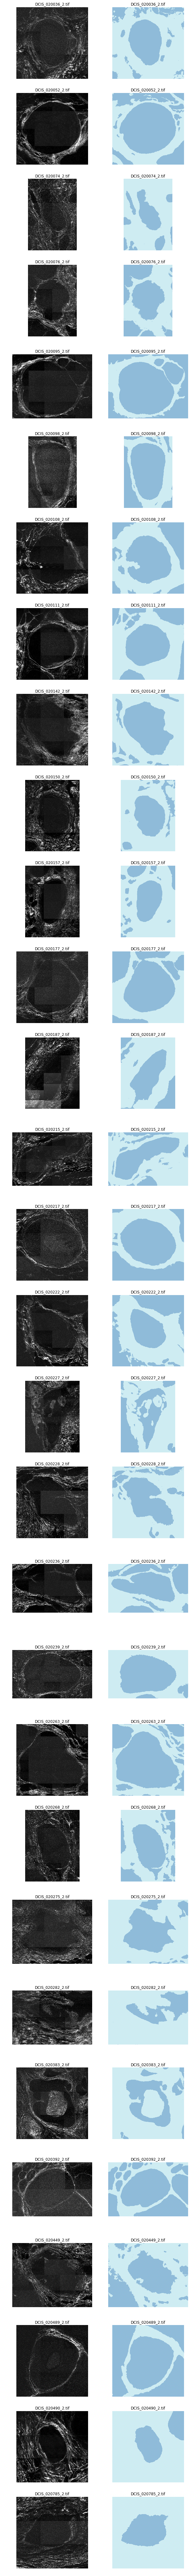

In [66]:
plot_img_mask(train_il, train_ll)

In [78]:
def invertlabels(fn):
    pilimg = PIL.Image.open(fn)
    arr = np.asarray(pilimg)
    unique_vals = list(np.unique(arr))
    if [0,255] == unique_vals:
        invertedimg = PIL.Image.fromarray(255 - arr)
    elif [0,1] == unique_vals:
        invertedimg = PIL.Image.fromarray(1 - arr)
    else: raise ValueError(f"Not binary with 255 or 1, has unique: {np.unique(arr)}")
    invertedimg.save(fn)

In [ ]:
# invertlabels(train_labels[-4])

### valid files

In [80]:
validation_files = get_files(PATH/"Validation_Image", recurse=True)

In [81]:
validation_images = [o for o in validation_files if "Seg" not in o.name]
validation_labels = [o for o in validation_files if "Seg" in o.name]

In [82]:
validation_images = sorted(validation_images, key=lambda x: x.name.split("_")[:3])
validation_labels = sorted(validation_labels, key=lambda x: x.name.split("_")[:3])

In [83]:
valid_il = ImageList(validation_images)
valid_ll = SegmentationLabelList(validation_labels)

In [84]:
valid_il

ImageList (15 items)
Image (3, 1886, 1886),Image (3, 2624, 2255),Image (3, 2255, 2624),Image (3, 1148, 779),Image (3, 1517, 779)
Path: .

In [85]:
valid_ll

SegmentationLabelList (15 items)
ImageSegment (1, 1886, 1886),ImageSegment (1, 2624, 2255),ImageSegment (1, 2255, 2624),ImageSegment (1, 1148, 779),ImageSegment (1, 1517, 779)
Path: .

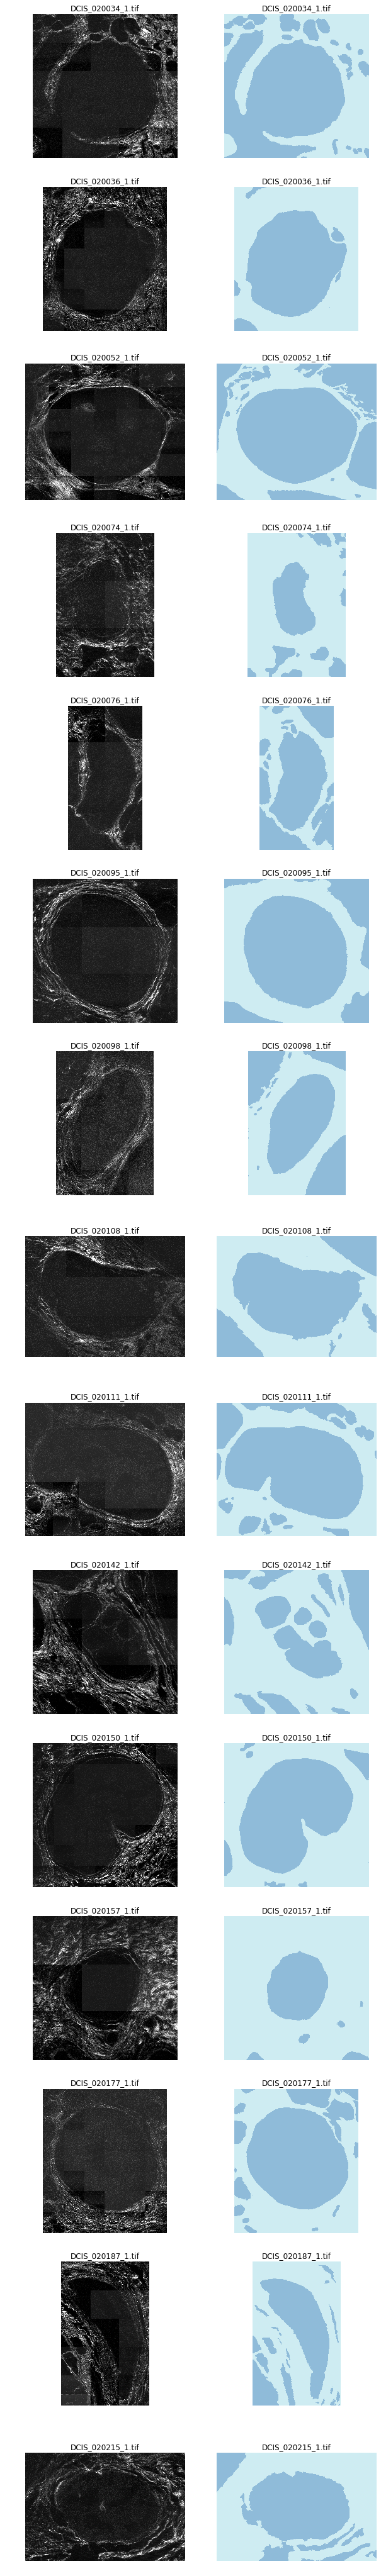

In [86]:
plot_img_mask(valid_il, valid_ll)

In [79]:
# invertlabels(validation_labels[6])
# invertlabels(validation_labels[-2])

### test files

In [87]:
test_files = get_files(PATH/"Test_Image", recurse=True)

In [88]:
test_images = [o for o in test_files if "Seg" not in o.name]
test_labels = [o for o in test_files if "Seg" in o.name]

In [89]:
test_images = sorted(test_images, key=lambda x: x.name.split("_")[:3])
test_labels = sorted(test_labels, key=lambda x: x.name.split("_")[:3])

In [90]:
test_il = ImageList(test_images)
test_ll = SegmentationLabelList(test_labels)

In [91]:
test_il

ImageList (15 items)
Image (3, 1886, 1886),Image (3, 1148, 1148),Image (3, 1886, 1886),Image (3, 1148, 1148),Image (3, 1886, 1886)
Path: .

In [92]:
test_ll

SegmentationLabelList (15 items)
ImageSegment (1, 1886, 1886),ImageSegment (1, 1148, 1148),ImageSegment (1, 1886, 1886),ImageSegment (1, 1148, 1148),ImageSegment (1, 1886, 1886)
Path: .

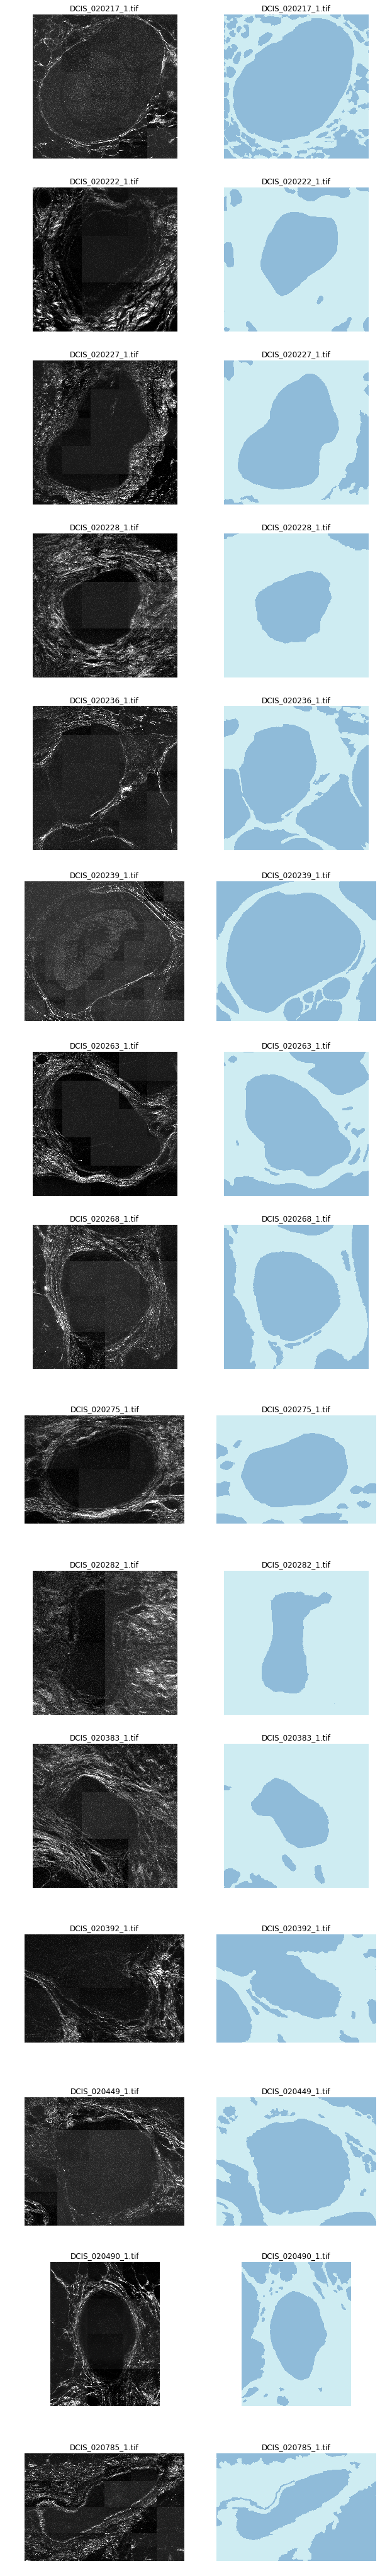

In [95]:
plot_img_mask(test_il, test_ll)

### all images, labels

In [96]:
images = train_images + validation_images + test_images
labels = train_labels + validation_labels + test_labels

In [97]:
len(images), len(labels)

(60, 60)

### images

In [98]:
image_id2fn = defaultdict(list)
for o in images:
    image_id = o.stem
    image_id2fn[image_id].append(o)

In [99]:
# ! version of image per patch ?
assert len(image_id2fn) == len(images)

In [101]:
for k, v in image_id2fn.items(): break

image id: DCIS_020036_2


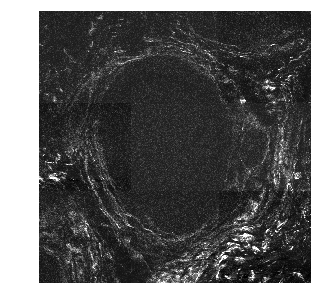

In [102]:
print(f"image id: {k}"); img = open_image(v[0]); img.show(figsize=(5,5))

In [103]:
# this is actually a single channel image!
img.data

tensor([[[0.1216, 0.1216, 0.1216,  ..., 0.1725, 0.0863, 0.0863],
         [0.1922, 0.1922, 0.1922,  ..., 0.1216, 0.0863, 0.1373],
         [0.1216, 0.1725, 0.1373,  ..., 0.1569, 0.1725, 0.1020],
         ...,
         [0.1216, 0.0863, 0.1020,  ..., 0.1725, 0.1216, 0.1020],
         [0.0863, 0.1020, 0.1373,  ..., 0.4392, 0.6863, 0.4039],
         [0.1373, 0.1922, 0.1020,  ..., 0.8078, 0.4039, 0.3137]],

        [[0.1216, 0.1216, 0.1216,  ..., 0.1725, 0.0863, 0.0863],
         [0.1922, 0.1922, 0.1922,  ..., 0.1216, 0.0863, 0.1373],
         [0.1216, 0.1725, 0.1373,  ..., 0.1569, 0.1725, 0.1020],
         ...,
         [0.1216, 0.0863, 0.1020,  ..., 0.1725, 0.1216, 0.1020],
         [0.0863, 0.1020, 0.1373,  ..., 0.4392, 0.6863, 0.4039],
         [0.1373, 0.1922, 0.1020,  ..., 0.8078, 0.4039, 0.3137]],

        [[0.1216, 0.1216, 0.1216,  ..., 0.1725, 0.0863, 0.0863],
         [0.1922, 0.1922, 0.1922,  ..., 0.1216, 0.0863, 0.1373],
         [0.1216, 0.1725, 0.1373,  ..., 0.1569, 0.1725, 0.

In [104]:
# check if data is duplicate over 3 channels
assert torch.equal(img.data[0], img.data[1]) == torch.equal(img.data[0], img.data[2])

### labels

In [105]:
label_id2fn = defaultdict(list)
for o in labels:
    label_id = "_".join(o.stem.split("_")[:3])
    label_id2fn[label_id].append(o)

In [106]:
assert len(label_id2fn) == len(labels)

mask id: DCIS_020036_2


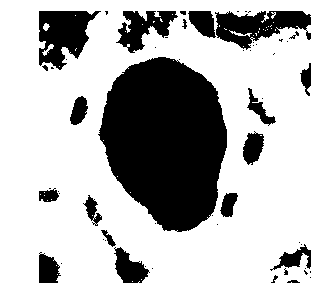

In [107]:
# masks are 0-255
print(f"mask id: {k}"); mask = open_mask(label_id2fn[k][0], div=True);
mask.show(figsize=(5,5), alpha=1., cmap='gray')

In [108]:
assert torch.equal(mask.data.unique(), tensor([0,1]))

In [109]:
for k1,k2 in zip(label_id2fn.keys(),image_id2fn.keys()):
    try: assert k1 == k2
    except: raise Exception(f"image key: {k1}, label key: {k2}")

In [29]:
# shutil.move('/home/turgutluk/data/breast_path/Images/DCIS_020489_2FinalSeg.tif',
#            '/home/turgutluk/data/breast_path/Images/DCIS_020489_2_FinalSeg.tif')

### save images and labels

In [110]:
shutil.rmtree(PATH/'images')
shutil.rmtree(PATH/'labels')
os.makedirs(PATH/'images', exist_ok=True)
os.makedirs(PATH/'labels', exist_ok=True)

In [111]:
# save images
for k,l in image_id2fn.items():
    save_fn = PATH/'images'/f'{k}.tif'
    img = open_image(l[0])
    img.save(save_fn)

In [112]:
# save labels
for k,l in label_id2fn.items():
    mask = open_mask(l[0], div=True)
    assert torch.equal(mask.data.unique(), tensor([0,1]))
    savefn = PATH/'labels'/f'{k}.tif'
    mask.save(savefn)
    mask = open_mask(savefn, div=False)
    assert torch.equal(mask.data.unique(), tensor([0,1]))

In [113]:
len(images), len(labels)

(60, 60)

### show

In [114]:
imagefiles = get_files(PATH/'images')
maskfiles = get_files(PATH/'labels')

In [115]:
imagefiles[0], maskfiles[0]

(PosixPath('/home/turgutluk/data/breast_path/images/DCIS_020490_1.tif'),
 PosixPath('/home/turgutluk/data/breast_path/labels/DCIS_020490_1.tif'))

In [116]:
img = open_image(imagefiles[0])
mask = open_mask(maskfiles[0])

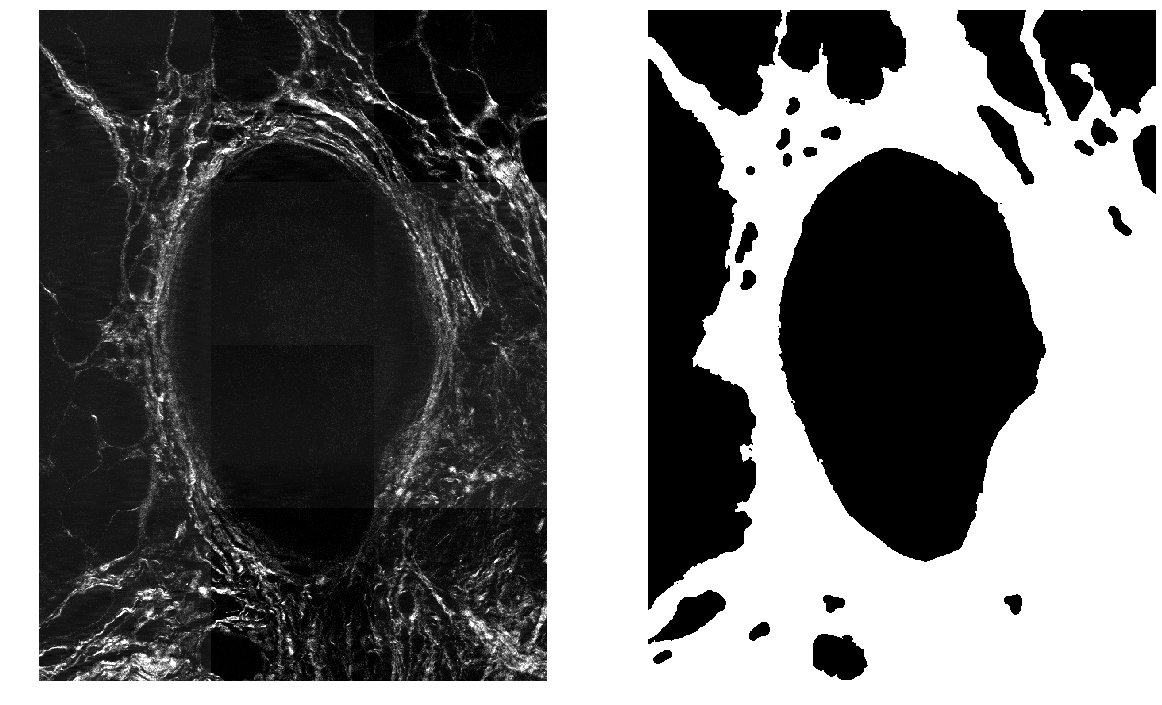

In [117]:
fig, axes = plt.subplots(1,2, figsize=(20,20))
img.show(ax=axes[0])
mask.show(ax=axes[1], cmap='gray', alpha=1.0)

### statistics

In [118]:
il = ImageList.from_folder(PATH/'images')
ll = SegmentationLabelList.from_folder(PATH/'labels')

In [119]:
il

ImageList (60 items)
Image (3, 1517, 1148),Image (3, 1517, 2255),Image (3, 779, 1148),Image (3, 1148, 1517),Image (3, 2624, 2993)
Path: /home/turgutluk/data/breast_path/images

In [120]:
ll

SegmentationLabelList (60 items)
ImageSegment (1, 1517, 1148),ImageSegment (1, 1517, 2255),ImageSegment (1, 779, 1148),ImageSegment (1, 1148, 1517),ImageSegment (1, 2624, 2993)
Path: /home/turgutluk/data/breast_path/labels

In [121]:
image_sizes = [o.size for o in il]
label_sizes = [o.size for o in ll]

In [122]:
assert image_sizes == label_sizes

In [123]:
h,w = list(zip(*image_sizes))

In [124]:
counts = defaultdict(int)
for hi, wi in zip(h,w):
    counts[(hi, wi)] += 1

In [125]:
counts

defaultdict(int,
            {(1517, 1148): 6,
             (1517, 2255): 2,
             (779, 1148): 5,
             (1148, 1517): 1,
             (2624, 2993): 1,
             (1517, 1517): 4,
             (1148, 1148): 16,
             (779, 779): 1,
             (1517, 1886): 4,
             (1886, 1886): 5,
             (1886, 1148): 1,
             (1886, 2255): 1,
             (2624, 2255): 2,
             (1148, 1886): 2,
             (2624, 2624): 1,
             (1148, 779): 3,
             (2255, 1517): 2,
             (2255, 2255): 1,
             (2255, 2624): 1,
             (1517, 779): 1})

### add codes and test

In [130]:
images = (PATH/'images').ls()

In [135]:
test_image_ids = {o.stem for o in test_images}

In [136]:
test_images = [o for o in images if o.stem in test_image_ids]

In [137]:
train_images = [o for o in images if o not in test_images]

In [138]:
len(test_images),len(train_images)

(15, 45)

In [139]:
# create codes.txt, train.txt, test.txt
with open(PATH/'codes.txt', 'w') as f: f.write("Cell_Interior\nCell_Wall")
with open(PATH/'train.txt', 'w') as f: f.write("\n".join([o.name for o in train_images]))
with open(PATH/'test.txt', 'w') as f: f.write("\n".join([o.name for o in test_images]))

In [140]:
PATH.ls()

[PosixPath('/home/turgutluk/data/breast_path/labels'),
 PosixPath('/home/turgutluk/data/breast_path/Images'),
 PosixPath('/home/turgutluk/data/breast_path/test.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Test_Image'),
 PosixPath('/home/turgutluk/data/breast_path/images'),
 PosixPath('/home/turgutluk/data/breast_path/train.txt'),
 PosixPath('/home/turgutluk/data/breast_path/codes.txt'),
 PosixPath('/home/turgutluk/data/breast_path/Validation_Image')]

In [141]:
with open(PATH/'train.txt') as f:
    train_txt = f.read()
    assert len(train_txt.split("\n")) == len(train_images)

with open(PATH/'test.txt') as f:
    test_txt = f.read()
    assert len(test_txt.split("\n")) == len(test_images)

### fin